In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2025-07-01 17:02:55.118685: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-01 17:02:55.133173: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751389375.151842    5575 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751389375.156878    5575 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-01 17:02:55.174861: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

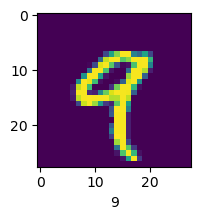

In [17]:
plot_sample(X_train, y_train, 4)

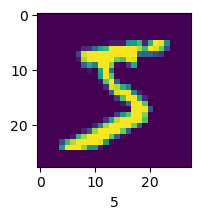

In [18]:
plot_sample(X_train, y_train, 0)

In [26]:
print(X_train.max())

255


Value ranges upto 255 so changing it into range of 0-1

In [28]:
X_train = X_train/255 
X_test = X_test/255

## ANN

In [30]:
ann = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5


I0000 00:00:1751390019.134572    6209 service.cc:148] XLA service 0x7ccf840071b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751390019.136037    6209 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-07-01 17:13:39.198743: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1751390019.304887    6209 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-01 17:13:40.891346: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_32', 468 bytes spill stores, 504 bytes spill loads

2025-07-01 17:13:41.356551: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_32',

   1/1875 ━━━━━━━━━━━━━━━━━━━━ 10:43:24 21s/step - accuracy: 0.2188 - loss: 2.3026

I0000 00:00:1751390038.974854    6209 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s -3254us/step - accuracy: 0.1218 - loss: 2.2985
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1157 - loss: 2.2962 
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1117 - loss: 2.2957
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1114 - loss: 2.2946
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.1150 - loss: 2.2928


In [31]:
ann.evaluate(X_test,y_test)

154/313 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.5023 - loss: 1.9584 

2025-07-01 17:17:42.074030: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 280 bytes spill stores, 336 bytes spill loads

2025-07-01 17:17:42.159439: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36_0', 276 bytes spill stores, 276 bytes spill loads

2025-07-01 17:17:42.230936: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_43', 112 bytes spill stores, 112 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5057 - loss: 1.9476 


[1.9257121086120605, 0.5151000022888184]

In [32]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.97      0.58       980
           1       0.90      0.81      0.85      1135
           2       0.90      0.07      0.13      1032
           3       0.42      0.85      0.56      1010
           4       0.47      0.78      0.59       982
           5       0.00      0.00      0.00       892
           6       0.51      0.83      0.63       958
           7       0.98      0.25      0.40      1028
           8       0.44      0.47      0.46       974
           9       0.83      0.06      0.12      1009

    accuracy                           0.52     10000
   macro avg       0.59      0.51      0.43     10000
weighted avg       0.60      0.52      0.44     10000



## CNN

In [34]:
cnn = models.Sequential([
    # First convolutional layer: extracts 32 feature maps using 3x3 filters
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)), # (28, 28, 1) -> 1 at the end for greyscale

    # Downsamples the feature maps using 2x2 pooling (reduces size and computation)
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer: extracts 64 feature maps using 3x3 filters
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),

    # Another 2x2 pooling to reduce spatial dimensions further
    layers.MaxPooling2D((2, 2)),

    # Flattens the 2D feature maps into a 1D vector for the dense layers
    layers.Flatten(),

    # Fully connected layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),

    # Output layer with 10 neurons (for 10 classes) and softmax for probabilities
    layers.Dense(10, activation='softmax')
])

In [35]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s -2230us/step - accuracy: 0.5522 - loss: 1.2805
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9284 - loss: 0.2380 
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 0.9539 - loss: 0.1519
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ -5s -2684us/step - accuracy: 0.9629 - loss: 0.1221
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9697 - loss: 0.0977  
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9730 - loss: 0.0865 
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9743 - loss: 0.0819
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9769 - loss: 0.0725 
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s -614us/step - accuracy: 0.9792 - loss: 0.0647
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9805 - loss: 0.0626


In [37]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9457 - loss: 34.8960


[31.077096939086914, 0.9470000267028809]

In [38]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.92      1.00      0.96      1135
           2       0.98      0.95      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.95      0.98      0.97       982
           5       0.92      0.98      0.95       892
           6       0.97      0.98      0.97       958
           7       0.84      0.98      0.91      1028
           8       0.99      0.85      0.92       974
           9       1.00      0.80      0.89      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

